In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from keras.datasets import mnist, fashion_mnist
import tensorflow.keras as kb
from tensorflow.keras import backend
import tensorflow as tf

# CNNs

In the lecture we learned about two different kinds of layers that allow us to directly consider spatial relationships in data (e.g. images).

- Convolutional Layers (`Conv2D`)
- Pooling Layers (`MaxPool2D`)

 ## Convolutional Layers
Convolutional Layers slide multiple filters/kernels across an input image and return the output.

Four things you need to think about are:

- number of filters
- size of filters (usually 3x3 or 5x5)
- stride (>0: but we tend not to use this)
- padding (options: `"valid", "same"`)


 ## Pooling Layers

 Pooling Layers Downsample our image to make it smaller. Typically we will use Max Pooling. We'll typically use a `(2,2)` filter. You can read more about Pooling Filter options [here](https://keras.io/api/layers/pooling_layers/).


# Together

Let's build a very simple ConvNet together.

First, we need to load in our data. Let's practice loading in data with **Kaggle**. We'll use this [Pneumonia Dataset]().

## `Kaggle.json`
First, go to Kaggle and make sure that you're logged in. Then go to your profile pic in the top right, and click on it. Then select **Your Profile**, then select the **Account** tab, and finally scroll down to the **API** section. Click **Create New Token**.

Find the `kaggle.json` file that downloads, and upload it to Colab. This file has all your account info so that you have permission to download data from kaggle.

Now, we'll actually download the data.



In [ ]:
# make kaggle directory
!mkdir ~/.kaggle

# move kaggle.json to hidden kaggle folder
!cp kaggle.json ~/.kaggle/

# change permissions on file
!chmod 600 ~/.kaggle/kaggle.json

# download zipped data
!kaggle datasets download -d lasaljaywardena/pneumonia-chest-x-ray-dataset

Now we need to unzip the data, luckily we can do that via commandline. The `-qq` just tells the computer not to print out the name of each file as it unzips.

In [ ]:
!unzip -qq pneumonia-chest-x-ray-dataset.zip

Next, store the file paths for our three data sets.

In [ ]:
train_dir = "./train"
test_dir = "./test"
val_dir = "./val"

And load in the data using `Tensorflow`'s `load_image_data_from_directory`.

In [ ]:
batch_size = 32
image_width = 150
image_height = 150

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir, # file path
  seed=123, # seed
  image_size= (image_width, image_height), # size of image
  batch_size=batch_size) # number of images per batch


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir, # file path
  seed=123, # seed
  image_size= (image_width, image_height), # size of image
  batch_size=batch_size) # number of images per batch


Finally, it's model building time. We'll build a simple model with `Sequential()`.

In [ ]:
model = kb.Sequential()

model.add(kb.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)))
model.add(kb.layers.MaxPooling2D((2, 2)))

model.add(kb.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(kb.layers.MaxPooling2D((2, 2)))

model.add(kb.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(kb.layers.MaxPooling2D((2, 2)))

model.add(kb.layers.Flatten())

model.add(kb.layers.Dense(128, activation='relu'))
model.add(kb.layers.Dropout(0.5))

model.add(kb.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=kb.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

history = model.fit(
    train_ds,
    epochs=2,
    validation_data= test_ds,
)

# Another One
Now let's try building one with the MNIST dataset.

In [ ]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

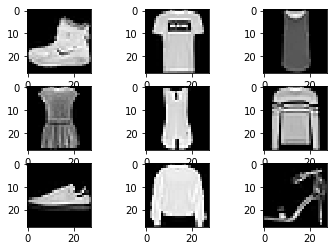

In [ ]:
# example of loading the fashion mnist dataset
from matplotlib import pyplot

# plot first few images
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # plot raw pixel data
 pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [ ]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = kb.utils.to_categorical(y_train, 10)
y_test = kb.utils.to_categorical(y_test, 10)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = kb.Sequential([
    kb.layers.Conv2D(32, (3, 3), activation='relu', padding = "same", input_shape=(28, 28, 1)),
    kb.layers.Conv2D(64, (3, 3), activation='relu', padding = "same"),
    kb.layers.MaxPooling2D((2, 2)),
    kb.layers.Flatten(),
    kb.layers.Dense(100, activation='relu'),
    kb.layers.Dense(10, activation='softmax'),
])

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, epochs=5, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 118s 2ms/step - loss: 0.3547 - acc: 0.8747 - val_loss: 0.2873 - val_acc: 0.8978
Epoch 2/5
60000/60000 [==============================] - 121s 2ms/step - loss: 0.2204 - acc: 0.9193 - val_loss: 0.2703 - val_acc: 0.9028
Epoch 3/5
60000/60000 [==============================] - 120s 2ms/step - loss: 0.1724 - acc: 0.9352 - val_loss: 0.2341 - val_acc: 0.9172
Epoch 4/5
60000/60000 [==============================] - 126s 2ms/step - loss: 0.1319 - acc: 0.9505 - val_loss: 0.2346 - val_acc: 0.9219
Epoch 5/5
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0983 - acc: 0.9634 - val_loss: 0.2648 - val_acc: 0.9200




 # In Class

Today we're going to try to run our first model on the server! We're going to build a ConvNet that does digit recognition using the MNIST data set we used in Classwork 5, but instead of running it in Colab or on your computer, you're going to run it on the server!

The famous dataset, MNIST, contains thousands of black and white pictures of handwritten digits.

So let's build a CNN that classifies handwritten digits.

<center><img src="https://drive.google.com/uc?export=view&id=1xZhgplIHkTkbKoL6SuWGHn_DL0AbNSPh" alt="mnist data" width = "500px" /></center>

In [ ]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = kb.utils.to_categorical(y_train, 10)
y_test = kb.utils.to_categorical(y_test, 10)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Build a ConvNet with your choice of architechture that includes:

- at least 4 Conv layers
- relu activations for your Conv layers
- pooling layers for at LEAST every 3 Conv layers (e.g. you could do Conv-Conv-Conv-Pool but don't do more than 3 Conv layers in a row without a Pool)
- has at least 1 Dense layer with a softmax activation to make the final prediction about which digit it is

In [ ]:
### YOUR MODEL HERE ###

If you'd like to work ahead, save your .ipynb file as a .py file (or just copy all the code into a separate .py file) and put it on the server either using `scp` or by connecting through VSCode using the SSH Remote extension.

Once your file is on the server, you can follow the instructions in the Server Google Doc to try to run it **inside a docker container**.